# Feature Transformation and Selection

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load all sheets from the Excel file
file_path = '../data/DataScientist_CaseStudy_Dataset.xlsx'

# Load sheets
soc_dem = pd.read_excel(file_path, sheet_name='Soc_Dem')
print(f"Shape of soc_dem: {soc_dem.shape}")
products = pd.read_excel(file_path, sheet_name='Products_ActBalance')
print(f"Shape of products: {products.shape}")
inflow_outflow = pd.read_excel(file_path, sheet_name='Inflow_Outflow')
print(f"Shape of inflow_outflow: {inflow_outflow.shape}")
sales_revenue = pd.read_excel(file_path, sheet_name='Sales_Revenues')
print(f"Shape of sales_revenue: {sales_revenue.shape}")
df = sales_revenue.merge(products, on='Client', how='left')\
            .merge(inflow_outflow, on='Client', how='left')\
               .merge(soc_dem, on='Client', how='left')

print(df.shape)
print("Duplicated: ", df.duplicated(subset= "Client").sum())
label_col = ['Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL']
feature_col = [col for col in df.columns if col not in label_col + ['Client']]

df.head()


Shape of soc_dem: (1615, 4)
Shape of products: (1615, 13)
Shape of inflow_outflow: (1587, 15)
Shape of sales_revenue: (969, 7)
(969, 36)
Duplicated:  0


,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Count_CA,Count_SA,Count_MF,...,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sex,Age,Tenure
0,1094,0,1,0,0.000000,5.138571,0.0000,1,NaN,NaN,...,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0,M,25,8
1,1484,1,0,1,25.609107,0.000000,8.7225,1,NaN,NaN,...,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0,M,39,0
2,20,0,1,0,0.000000,3.822500,0.0000,1,1.0,NaN,...,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0,M,27,181
3,1193,0,0,0,0.000000,0.000000,0.0000,2,NaN,NaN,...,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0,M,48,16
4,142,0,0,0,0.000000,0.000000,0.0000,1,NaN,NaN,...,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0,F,27,183


In [3]:
df["ActBal_CC"].describe()

count     110.000000
mean      280.908494
std       376.194964
min       -15.479286
25%         0.767857
50%        37.125000
75%       491.310179
max      1767.785357
Name: ActBal_CC, dtype: float64

In [4]:
feature_col

['Count_CA',
 'Count_SA',
 'Count_MF',
 'Count_OVD',
 'Count_CC',
 'Count_CL',
 'ActBal_CA',
 'ActBal_SA',
 'ActBal_MF',
 'ActBal_OVD',
 'ActBal_CC',
 'ActBal_CL',
 'VolumeCred',
 'VolumeCred_CA',
 'TransactionsCred',
 'TransactionsCred_CA',
 'VolumeDeb',
 'VolumeDeb_CA',
 'VolumeDebCash_Card',
 'VolumeDebCashless_Card',
 'VolumeDeb_PaymentOrder',
 'TransactionsDeb',
 'TransactionsDeb_CA',
 'TransactionsDebCash_Card',
 'TransactionsDebCashless_Card',
 'TransactionsDeb_PaymentOrder',
 'Sex',
 'Age',
 'Tenure']

In [5]:
# Fill missing
col_exclude = 'Sex'

df[df.columns.difference([col_exclude])] = df[df.columns.difference([col_exclude])].fillna(0)
df = df.dropna() # Dropna
df.isnull().sum()

Client                          0
Sale_MF                         0
Sale_CC                         0
Sale_CL                         0
Revenue_MF                      0
Revenue_CC                      0
Revenue_CL                      0
Count_CA                        0
Count_SA                        0
Count_MF                        0
Count_OVD                       0
Count_CC                        0
Count_CL                        0
ActBal_CA                       0
ActBal_SA                       0
ActBal_MF                       0
ActBal_OVD                      0
ActBal_CC                       0
ActBal_CL                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDe

In [6]:
# Filter erroneous tenure
print(f"Pre-filtered shape: {len(df)}")
df =  df[df['Tenure']/12 <= df['Age']]
print(f"Post-filtered shape: {len(df)}")

Pre-filtered shape: 967
Post-filtered shape: 933


In [7]:
# Create Dummy Columns
dummies = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True).astype(int)
df = df.drop('Sex', axis=1).join(dummies)

In [8]:
df[df.isna().any(axis=1)]

,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Count_CA,Count_SA,Count_MF,...,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Age,Tenure,Sex_M


In [9]:
# Log transform
col_to_transform = [col for col in df.columns if (col.startswith('Volume') or col.startswith('Transactions'))]
df[col_to_transform] = df[col_to_transform].apply(lambda x: np.log1p(x))
df.describe()

,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Count_CA,Count_SA,Count_MF,...,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Age,Tenure,Sex_M
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,...,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,809.939979,0.202572,0.250804,0.286174,1.984476,2.783249,3.388565,1.077170,0.319400,0.926045,...,2.751526,4.164421,2.357480,2.247337,0.790142,1.117071,1.280376,44.314041,98.518757,0.535906
std,463.643784,0.402132,0.433708,0.452214,10.123181,18.021070,7.554915,0.328287,0.577492,4.124133,...,2.627080,2.804534,1.082752,1.030170,0.759141,1.177716,0.971236,17.526956,64.766458,0.498977
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,420.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.609438,1.609438,0.000000,0.000000,0.000000,30.000000,40.000000,0.000000
50%,810.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.241476,5.162539,2.564949,2.397895,0.693147,0.693147,1.386294,42.000000,92.000000,1.000000
75%,1212.000000,0.000000,1.000000,1.000000,0.000000,0.071429,4.214286,1.000000,1.000000,0.000000,...,5.200303,6.196953,3.135494,2.995732,1.386294,2.079442,2.079442,58.000000,151.000000,1.000000
max,1613.000000,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357,4.000000,3.000000,79.000000,...,8.199359,11.034181,4.634729,4.430817,3.258097,4.110874,3.555348,90.000000,271.000000,1.000000


# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

def split_df(df, label_cols, test_size=0.1, val_size=0.1, random_state=None, shuffle=True):
    """
    Split a DataFrame into train, validation, and test sets with stratification
    based on the combination of multiple label columns.

    Parameters:
    - df: pandas DataFrame
    - label_cols: list of str, column names for labels (for stratification)
    - test_size: float, fraction of data for test set (default 0.2)
    - val_size: float, fraction of data for validation set (default 0.1)
    - random_state: int or None, for reproducibility
    - shuffle: bool, whether to shuffle before splitting (default True)

    Returns:
    - X_train, X_val, X_test, y_train, y_val, y_test as DataFrames
    """
    if not isinstance(label_cols, list):
        raise ValueError("label_cols must be a list of column names")

    # Create stratification key by combining label columns as a tuple of string
    stratify_key = df[label_cols].astype(str).agg('_'.join, axis=1)

    X = df.drop(columns=label_cols)
    y = df[label_cols]

    # First split: train+val and test with stratification
    X_train_val, X_test, y_train_val, y_test, strat_train_val, strat_test = train_test_split(
        X, y, stratify_key, test_size=test_size, random_state=random_state, shuffle=shuffle
    )

    # Adjust val_size relative to remaining train_val set
    val_adjusted = val_size / (1 - test_size)

    # Second split: train and val with stratification
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_adjusted,
        stratify=strat_train_val,
        random_state=random_state, shuffle=shuffle
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_df(
    df, label_cols=['Sale_MF', 'Sale_CC', 'Sale_CL'], test_size=0.1, val_size=0.1, random_state=42
)
print(X_train.shape, X_test.shape, X_val.shape)
X_train.head()

(745, 33) (94, 33) (94, 33)


,Client,Revenue_MF,Revenue_CC,Revenue_CL,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Age,Tenure,Sex_M
194,721,0.0,4.464286,0.000000,1,1.0,0.0,1.0,0.0,0.0,...,5.030134,6.703035,2.890372,2.890372,0.693147,1.609438,2.484907,67,82,0
120,1456,0.0,3.607143,0.000000,1,1.0,0.0,0.0,0.0,0.0,...,6.211492,5.559169,3.367296,3.367296,0.693147,3.044522,1.791759,61,149,0
859,1579,0.0,0.000000,4.388929,1,1.0,3.0,0.0,0.0,0.0,...,6.819962,6.669770,3.258097,3.258097,1.791759,2.397895,2.197225,50,0,1
705,1272,0.0,0.000000,0.000000,1,0.0,1.0,0.0,0.0,0.0,...,5.667504,6.830141,2.944439,2.944439,1.386294,1.609438,2.302585,35,96,1
762,123,0.0,0.000000,10.461071,2,0.0,0.0,0.0,0.0,0.0,...,3.553305,0.000000,1.098612,1.098612,0.000000,0.693147,0.000000,22,40,0


In [11]:
from sklearn.preprocessing import MinMaxScaler

col_trans = [col for col in X_train.columns if col.startswith('Act')]

scaler = MinMaxScaler()

# Fit scaler on X_train only 
scaler.fit(X_train[col_trans])

# Transform all sets with the fitted scaler
X_train[col_trans] = scaler.transform(X_train[col_trans])
X_test[col_trans] = scaler.transform(X_test[col_trans])
X_val[col_trans] = scaler.transform(X_val[col_trans])
X_train[col_trans]

,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
194,0.002918,0.071552,0.000000,0.315210,0.004664,0.000000
120,0.000000,0.000000,0.000000,0.000000,0.004664,0.000000
859,0.005701,0.022042,0.000000,0.000000,0.004664,0.000000
705,0.077216,0.000000,0.010122,0.000000,0.004664,0.000000
762,0.118556,0.000000,0.000000,0.000000,0.004664,0.000000
...,...,...,...,...,...,...
827,0.000516,0.000000,0.000000,0.000000,0.004664,0.000000
799,0.122318,0.000000,0.000000,0.420828,0.004664,0.000000
589,0.003368,0.000000,0.000000,0.000000,0.004664,0.016971
222,0.424263,0.032371,0.000000,0.000000,0.004664,0.000000


# Modelling and Analysis

In [12]:
import numpy as np
import pandas as pd
import yaml
from typing import List, Optional, Dict, Any, Union
from pydantic import BaseModel, Field
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    f1_score, precision_score, recall_score, roc_auc_score, roc_curve
)
from sklearn.model_selection import GridSearchCV
import wandb
import warnings
import os
import joblib
import itertools
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

class ModelHyperparams(BaseModel):
    random_forest: dict = Field(default_factory=dict)
    xgboost: dict = Field(default_factory=dict)


class WandbConfig(BaseModel):
    project_name: str
    run_name: str = None
    hyperparameters: ModelHyperparams


def load_wandb_config(yaml_path: str) -> WandbConfig:
    with open(yaml_path, "r") as f:
        cfg = yaml.safe_load(f)
    return WandbConfig.parse_obj(cfg)


class ClassifierTrainer:
    def __init__(
        self,
        model_name: str,
        config: ModelHyperparams,
        feature_cols: List[str],
        label_col: str,
        wandb_config: WandbConfig,
    ):
        self.model_name = model_name
        self.config = config
        self.feature_cols = feature_cols
        self.label_col = label_col
        self.best_threshold = 0.5
        self.model = self._init_model()

        self.wandb_run = wandb.init(
            project=wandb_config.project_name,
            name=wandb_config.run_name,
            config=config.dict(),
        )
        wandb.config.update({"model_name": model_name})

    def _init_model(self):
        if self.model_name == "random_forest":
            return RandomForestClassifier(random_state=42)
        elif self.model_name == "xgboost":
            return XGBClassifier(
                use_label_encoder=False,
                eval_metric="logloss",
                random_state=42,
                n_estimators=80,
                learning_rate=0.001,
            )
        else:
            raise ValueError(f"Unsupported model_name: {self.model_name}")
    def tune_hyperparameters(
        self,
        X_train: pd.DataFrame,
        y_train: Union[pd.Series, np.ndarray],
        X_val: pd.DataFrame,
        y_val: Union[pd.Series, np.ndarray],
    ):
        X_train_filtered = X_train[self.feature_cols]
        X_val_filtered = X_val[self.feature_cols]
        y_train = y_train[self.label_col]
        y_val = y_val[self.label_col]

        param_grid = getattr(self.config, self.model_name, {})
        if not param_grid:
            raise ValueError(f"No hyperparameter grid provided for {self.model_name}.")

        best_f1 = -1
        best_params = None
        best_model = None
        best_threshold = 0.5

        keys, values = zip(*param_grid.items())
        for v in itertools.product(*values):
            params = dict(zip(keys, v))
            model = self.model.__class__(**params)
            model.fit(X_train_filtered, y_train)

            val_probs = model.predict_proba(X_val_filtered)[:, 1]
            threshold = self._tune_threshold(np.array(y_val), val_probs)
            val_preds = (val_probs >= threshold).astype(int)

            f1 = f1_score(y_val, val_preds)
            if f1 > best_f1:
                best_f1 = f1
                best_params = params
                best_model = model
                best_threshold = threshold

        # Save best model and threshold
        self.model = best_model
        self.best_threshold = best_threshold

        print(f"\nBest hyperparameters for {self.model_name}: {best_params}")
        print(f"Best threshold tuned on validation set: {best_threshold:.3f}")
        print(f"Best validation F1: {best_f1:.4f}\n")

        # Evaluate best model on train and val set
        train_probs = best_model.predict_proba(X_train_filtered)[:, 1]
        val_probs = best_model.predict_proba(X_val_filtered)[:, 1]

        train_preds = (train_probs >= best_threshold).astype(int)
        val_preds = (val_probs >= best_threshold).astype(int)

        train_f1 = f1_score(y_train, train_preds)
        val_f1 = f1_score(y_val, val_preds)

        train_precision = precision_score(y_train, train_preds)
        val_precision = precision_score(y_val, val_preds)

        train_recall = recall_score(y_train, train_preds)
        val_recall = recall_score(y_val, val_preds)

        train_auc = roc_auc_score(y_train, train_probs)
        val_auc = roc_auc_score(y_val, val_probs)

        print("Metrics using Best Model BEFORE Retraining:")
        print(f"Train F1: {train_f1:.4f} | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | ROC AUC: {train_auc:.4f}")
        print(f"Val   F1: {val_f1:.4f} | Precision: {val_precision:.4f} | Recall: {val_recall:.4f} | ROC AUC: {val_auc:.4f}\n")

        wandb.log({
            "best_hyperparameters": best_params,
            "best_threshold": best_threshold,
            "train_f1": train_f1,
            "train_precision": train_precision,
            "train_recall": train_recall,
            "train_auc": train_auc,
            "val_f1": val_f1,
            "val_precision": val_precision,
            "val_recall": val_recall,
            "val_auc": val_auc,
        })

        # Retrain on combined train + val set with best params
        X_combined = pd.concat([X_train_filtered, X_val_filtered], axis=0)
        y_combined = pd.concat([y_train, y_val], axis=0)

        final_model = self.model.__class__(**best_params)
        final_model.fit(X_combined, y_combined)
        self.model = final_model  # Update final model

    def _tune_threshold(self, y_true: np.ndarray, y_probs: np.ndarray) -> float:
        thresholds = np.linspace(0.1, 0.9, 81)
        f1_scores = [(f1_score(y_true, (y_probs >= t).astype(int))) for t in thresholds]
        return thresholds[np.argmax(f1_scores)]

    def evaluate(
        self,
        X_test: pd.DataFrame,
        y_test: Union[pd.Series, np.ndarray],
    ) -> dict:
        
        X_test_filtered = X_test[self.feature_cols]
        y_test = y_test[self.label_col]
        
        probs = self.model.predict_proba(X_test_filtered)[:, 1]
        preds = (probs >= self.best_threshold).astype(int)

        # Original threshold-based metrics
        metrics = {
            "f1": f1_score(y_test, preds),
            "precision": precision_score(y_test, preds, zero_division=0),
            "recall": recall_score(y_test, preds),
            "auc": roc_auc_score(y_test, probs),
            "threshold": self.best_threshold,
        }

        # Top 15% targeting logic
        top_k_percent = 0.15
        n_top = int(len(probs) * top_k_percent)
        sorted_indices = probs.argsort()[::-1]

        top_indices = sorted_indices[:n_top]
        top_y = y_test.iloc[top_indices].values

        positives_in_top = top_y.sum()
        total_positives = y_test.sum()

        top15_precision = positives_in_top / n_top if n_top > 0 else 0
        top15_recall = positives_in_top / total_positives if total_positives > 0 else 0
        baseline_positive_rate = total_positives / len(y_test) if len(y_test) > 0 else 0
        lift = (top15_precision / baseline_positive_rate) if baseline_positive_rate > 0 else 0

        metrics.update({
            "top15_precision": top15_precision,
            "top15_recall": top15_recall,
            "top15_lift": lift,
        })

        # ROC Curve plotting
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        auc_score = metrics["auc"]

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.grid()

        # Save plot to file if needed
        plt.savefig("roc_curve.png", bbox_inches="tight")
        plt.show()

        # Optionally log to wandb
        wandb.log({"roc_curve": wandb.Image("roc_curve.png")})
        wandb.log(metrics)

        print("\nEvaluation Metrics:")
        for k, v in metrics.items():
            print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

        return metrics
    def predict(
        self,
        X: pd.DataFrame,
    ) -> (np.ndarray, np.ndarray):
        X_filtered = X[self.feature_cols]
        probs = self.model.predict_proba(X_filtered)[:, 1]
        preds = (probs >= self.best_threshold).astype(int)
        return preds, probs
    
    def save_model(self, output_folder: str):
        os.makedirs(output_folder, exist_ok=True)
        
        model_path = os.path.join(output_folder, f"{self.model_name}_model.joblib")
        threshold_path = os.path.join(output_folder, f"{self.model_name}_threshold.txt")
        
        # Save the model
        joblib.dump(self.model, model_path)
        
        # Save the threshold as a text file
        with open(threshold_path, "w") as f:
            f.write(str(self.best_threshold))
        
        print(f"Model saved to {model_path}")
        print(f"Threshold saved to {threshold_path}")

    def close(self):
        wandb.finish()

In [13]:
def analyze_feature_importance(
    model,
    X_test: Union[pd.DataFrame, np.ndarray],
    feature_names: Optional[List[str]] = None,
    top_n: Optional[int] = None,
    plot: bool = True,
) -> pd.DataFrame:
    """
    Analyze and rank feature importance for Random Forest or XGBoost.

    Parameters:
    - model: Trained model (RandomForestClassifier or XGBClassifier)
    - X_test: Test dataset features (DataFrame or array)
    - feature_names: Optional list of feature names (if X_test is array)
    - top_n: Show top N most relevant features (None = show all)
    - plot: Whether to show bar plot of feature importance

    Returns:
    - Pandas DataFrame with columns: ["feature", "importance"], sorted descending
    """

    import matplotlib.pyplot as plt
    import seaborn as sns
    X_test = X_test[feature_names]
    if feature_names is None:
        if isinstance(X_test, pd.DataFrame):
            feature_names = X_test.columns.tolist()
        else:
            raise ValueError("Provide feature_names if X_test is not a DataFrame")

    # Get importance scores
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    elif hasattr(model, "get_booster"):
        importance_dict = model.get_booster().get_score(importance_type="gain")
        importance = np.array(
            [importance_dict.get(f"f{i}", 0.0) for i in range(len(feature_names))]
        )
    else:
        raise ValueError("Model does not provide feature importance")

    importance_df = (
        pd.DataFrame({"feature": feature_names, "importance": importance})
        .sort_values(by="importance", ascending=False)
        .reset_index(drop=True)
    )

    if top_n:
        importance_df = importance_df.head(top_n)

    if plot:
        plt.figure(figsize=(10, max(4, 0.4 * len(importance_df))))
        sns.barplot(x="importance", y="feature", data=importance_df, palette="viridis")
        plt.title("Feature Importance (Most to Least Relevant)")
        plt.show()

    return importance_df

In [14]:
from typing import List, Optional
from pydantic import BaseModel, Field
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import joblib
import os

class PCATransformer(BaseModel):
    cat_columns: List[str] = Field(default_factory=list)
    variance_threshold: float = 0.99995
    pca: Optional[PCA] = None
    non_cat_columns_: Optional[List[str]] = None

    model_config = {"arbitrary_types_allowed": True}

    def fit(self, df: pd.DataFrame):
        # Identify numeric columns to apply PCA
        self.non_cat_columns_ = [col for col in df.columns if col not in self.cat_columns]
        numeric_data = df[self.non_cat_columns_].select_dtypes(include=[np.number])

        # Fit PCA with enough components to explain variance_threshold
        pca_full = PCA(n_components=min(len(numeric_data.columns), len(numeric_data)))
        pca_full.fit(numeric_data)
        
        # Find the number of components needed for variance_threshold
        cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
        n_components = np.searchsorted(cumulative_variance, self.variance_threshold) + 1

        # Fit PCA again with n_components
        self.pca = PCA(n_components=n_components)
        self.pca.fit(numeric_data)
        return self

    def transform(self, df: pd.DataFrame) -> pd.DataFrame:
        if self.pca is None or self.non_cat_columns_ is None:
            raise RuntimeError("PCATransformer must be fitted before calling transform.")

        # Separate cat and numeric columns
        cat_df = df[self.cat_columns].copy()
        numeric_df = df[self.non_cat_columns_].select_dtypes(include=[np.number]).copy()

        # Transform numeric features using PCA
        pca_components = self.pca.transform(numeric_df)

        # Create dataframe for PCA components with names PC1, PC2, ...
        pca_cols = [f"PC{i+1}" for i in range(pca_components.shape[1])]
        pca_df = pd.DataFrame(pca_components, columns=pca_cols, index=df.index)

        # Concatenate categorical columns untouched with PCA components
        transformed_df = pd.concat([cat_df, pca_df], axis=1)
        return transformed_df

    def fit_transform(self, df: pd.DataFrame) -> pd.DataFrame:
        self.fit(df)
        return self.transform(df)

    def save(self, path: str):
        os.makedirs(path, exist_ok=True)
        joblib.dump(self.pca, os.path.join(path, "pca.joblib"))
        joblib.dump(self.cat_columns, os.path.join(path, "cat_columns.joblib"))
        joblib.dump(self.non_cat_columns_, os.path.join(path, "non_cat_columns.joblib"))

    def load(self, path: str):
        self.pca = joblib.load(os.path.join(path, "pca.joblib"))
        self.cat_columns = joblib.load(os.path.join(path, "cat_columns.joblib"))
        self.non_cat_columns_ = joblib.load(os.path.join(path, "non_cat_columns.joblib"))
        return self

In [15]:
import os
from dotenv import load_dotenv
import wandb

# Load .env variables
load_dotenv()

# Login to Weights & Biases
wandb_api_key = os.getenv("WANDB_API_KEY")
if wandb_api_key:
    wandb.login(key=wandb_api_key)
else:
    raise EnvironmentError("WANDB_API_KEY not found in .env file")

wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Ng Wei Xuan\_netrc
wandb: Currently logged in as: weixuan to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


## Sale_MF

In [16]:
print(X_train.columns)
feature_cols = ['ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC',
       'ActBal_CL', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Age', 'Tenure', 'Sex_M']  

# X_train_filtered = X_train[feature_cols]
# X_test_filtered = X_test[feature_cols]
# X_val_filtered = X_val[feature_cols]

# y_train_MF, y_test_MF, y_val_MF = y_train["Sale_MF"], y_test["Sale_MF"], y_val["Sale_MF"]
# y_train_CC, y_test_CC, y_val_CC = y_train["Sale_CC"], y_test["Sale_CC"], y_val["Sale_CC"]
# y_train_CL, y_test_CL, y_val_CL = y_train["Sale_CL"], y_test["Sale_CL"], y_val["Sale_CL"]  

Index(['Client', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL', 'Count_CA',
       'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL',
       'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC',
       'ActBal_CL', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Age', 'Tenure', 'Sex_M'],
      dtype='object')


In [17]:
wandb_cfg = load_wandb_config("../configs/config.yaml")
wandb_cfg.run_name = "sale_mf_rf"


Best hyperparameters for random_forest: {'max_depth': 3, 'min_samples_split': 5}
Best threshold tuned on validation set: 0.200
Best validation F1: 0.4681

Metrics using Best Model BEFORE Retraining:
Train F1: 0.4650 | Precision: 0.4294 | Recall: 0.5069 | ROC AUC: 0.7875
Val   F1: 0.4681 | Precision: 0.3793 | Recall: 0.6111 | ROC AUC: 0.6842



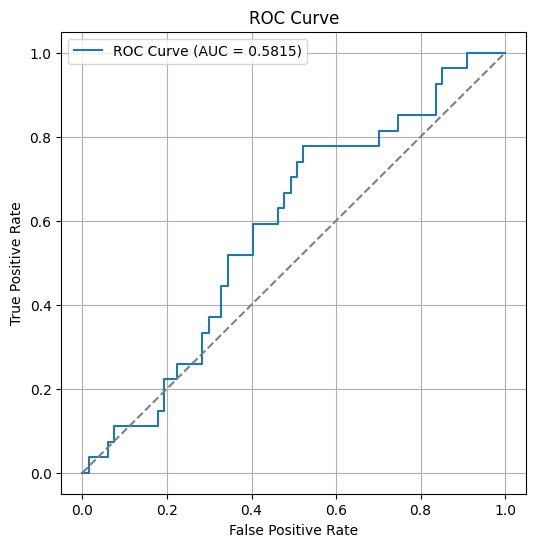


Evaluation Metrics:
f1: 0.2692
precision: 0.2800
recall: 0.2593
auc: 0.5815
threshold: 0.2000
top15_precision: 0.2143
top15_recall: 0.1111
top15_lift: 0.7460
Test Metrics: {'f1': 0.2692307692307692, 'precision': 0.28, 'recall': 0.25925925925925924, 'auc': 0.5815367606412383, 'threshold': 0.2, 'top15_precision': 0.21428571428571427, 'top15_recall': 0.1111111111111111, 'top15_lift': 0.7460317460317459}
Model saved to model/sale_mf/rf/random_forest_model.joblib
Threshold saved to model/sale_mf/rf/random_forest_threshold.txt


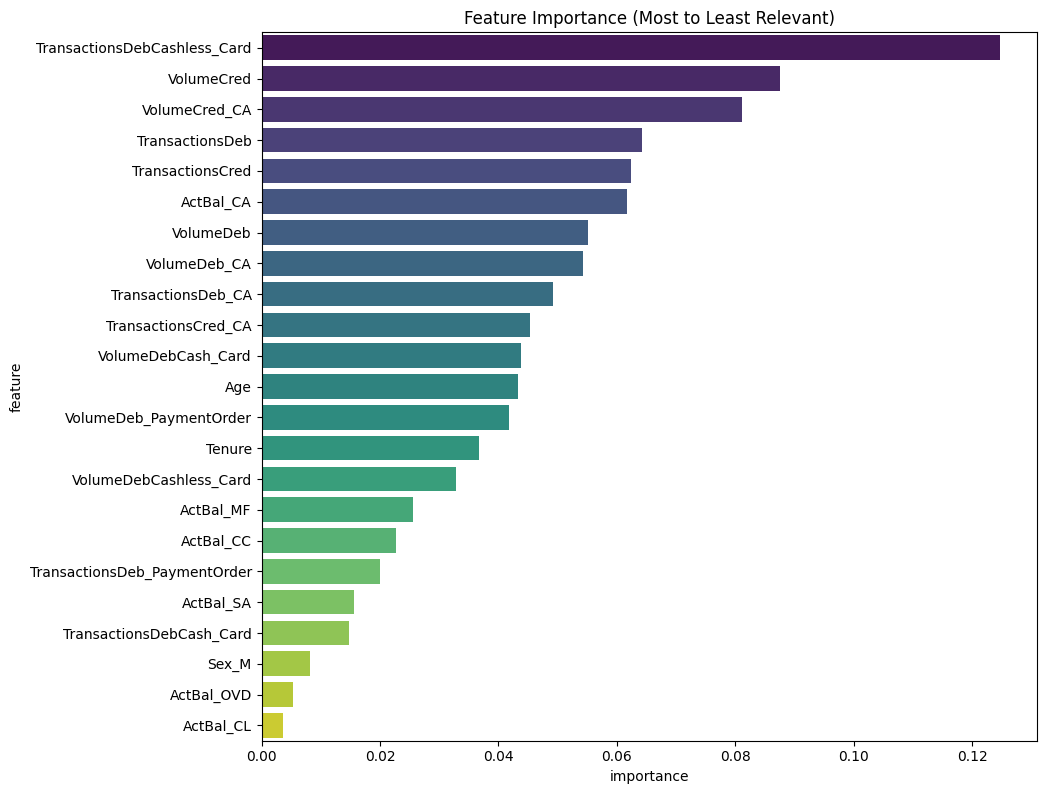

                         feature  importance
0   TransactionsDebCashless_Card    0.124646
1                     VolumeCred    0.087640
2                  VolumeCred_CA    0.081207
3                TransactionsDeb    0.064209
4               TransactionsCred    0.062438
5                      ActBal_CA    0.061754
6                      VolumeDeb    0.055179
7                   VolumeDeb_CA    0.054258
8             TransactionsDeb_CA    0.049227
9            TransactionsCred_CA    0.045336
10            VolumeDebCash_Card    0.043825
11                           Age    0.043375
12        VolumeDeb_PaymentOrder    0.041744
13                        Tenure    0.036783
14        VolumeDebCashless_Card    0.032798
15                     ActBal_MF    0.025515
16                     ActBal_CC    0.022675
17  TransactionsDeb_PaymentOrder    0.020051
18                     ActBal_SA    0.015595
19      TransactionsDebCash_Card    0.014748
20                         Sex_M    0.008136
21        

auc,▁
best_threshold,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁
train_auc,▁
train_f1,▁


In [18]:
# Initialize trainer
trainer = ClassifierTrainer(
    model_name="random_forest",
    config=wandb_cfg.hyperparameters,
    feature_cols=feature_cols,
    label_col = "Sale_MF",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train, y_train, X_val, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_mf/rf/")

feature_importance = analyze_feature_importance(
    trainer.model,
    X_test,
    feature_cols
)
print(feature_importance)

# Close wandb run
trainer.close()


Best hyperparameters for xgboost: {'max_depth': 10, 'min_child_weight': 1}
Best threshold tuned on validation set: 0.370
Best validation F1: 0.4848

Metrics using Best Model BEFORE Retraining:
Train F1: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | ROC AUC: 1.0000
Val   F1: 0.4848 | Precision: 0.5333 | Recall: 0.4444 | ROC AUC: 0.6630



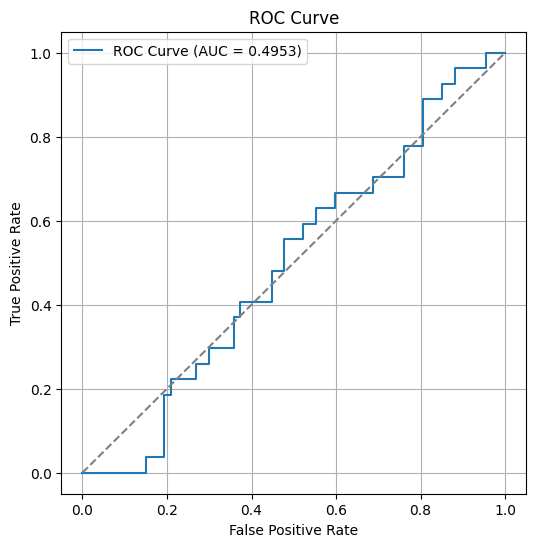


Evaluation Metrics:
f1: 0.0500
precision: 0.0769
recall: 0.0370
auc: 0.4953
threshold: 0.3700
top15_precision: 0.0714
top15_recall: 0.0370
top15_lift: 0.2487
Test Metrics: {'f1': 0.05, 'precision': 0.07692307692307693, 'recall': 0.037037037037037035, 'auc': 0.49530127142067437, 'threshold': 0.37, 'top15_precision': 0.07142857142857142, 'top15_recall': 0.037037037037037035, 'top15_lift': 0.24867724867724864}
Model saved to model/sale_mf/xgboost/xgboost_model.joblib
Threshold saved to model/sale_mf/xgboost/xgboost_threshold.txt


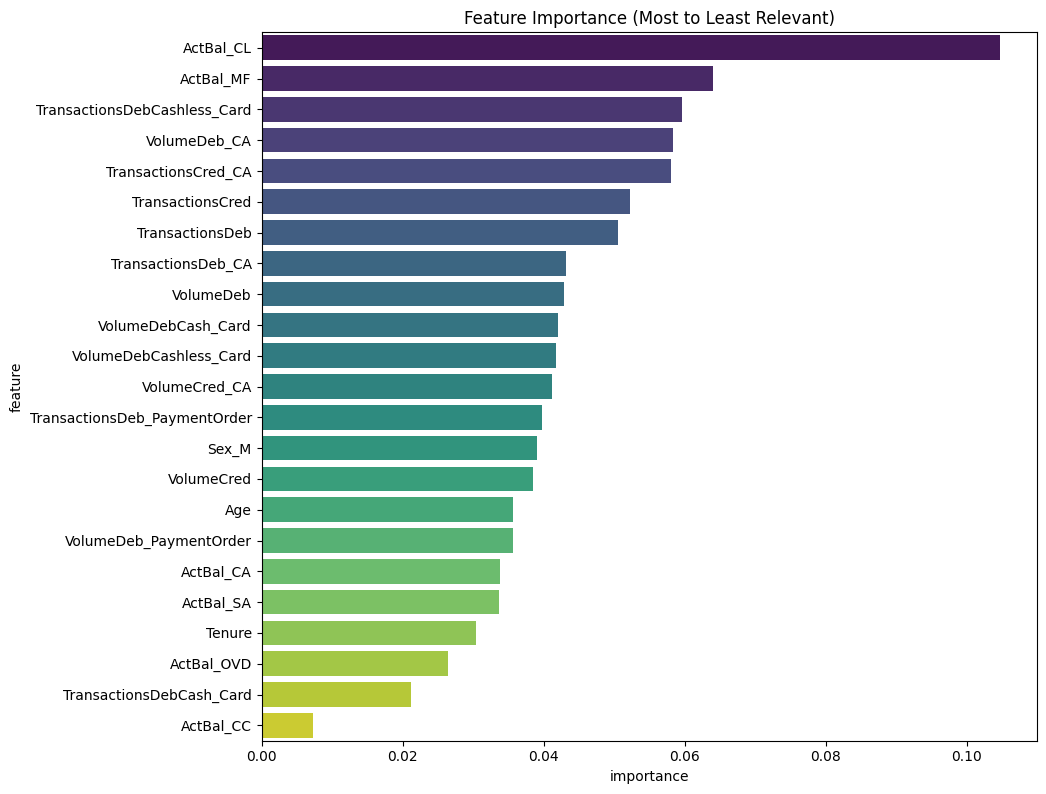

                         feature  importance
0                      ActBal_CL    0.104669
1                      ActBal_MF    0.064038
2   TransactionsDebCashless_Card    0.059561
3                   VolumeDeb_CA    0.058345
4            TransactionsCred_CA    0.058006
5               TransactionsCred    0.052274
6                TransactionsDeb    0.050508
7             TransactionsDeb_CA    0.043239
8                      VolumeDeb    0.042920
9             VolumeDebCash_Card    0.042006
10        VolumeDebCashless_Card    0.041811
11                 VolumeCred_CA    0.041221
12  TransactionsDeb_PaymentOrder    0.039823
13                         Sex_M    0.039097
14                    VolumeCred    0.038449
15                           Age    0.035647
16        VolumeDeb_PaymentOrder    0.035624
17                     ActBal_CA    0.033861
18                     ActBal_SA    0.033661
19                        Tenure    0.030348
20                    ActBal_OVD    0.026395
21      Tr

auc,▁
best_threshold,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁
train_auc,▁
train_f1,▁


In [19]:
wandb_cfg = load_wandb_config("../configs/config.yaml")
wandb_cfg.run_name = "sale_mf_xgboost"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="xgboost",
    config=wandb_cfg.hyperparameters,
    feature_cols=feature_cols,
    label_col = "Sale_MF",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train, y_train, X_val, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_mf/xgboost/")

feature_importance = analyze_feature_importance(
    trainer.model,
    X_test,
    feature_cols
)
print(feature_importance)

# Close wandb run
trainer.close()

In [20]:
# Assume you know your categorical columns, e.g.:
categorical_cols = ["Sex_M"]

# Instantiate the transformer
pca_transformer = PCATransformer(cat_columns=categorical_cols)

# Fit PCA on training data and transform
X_train_pca = pca_transformer.fit_transform(X_train[feature_cols])

# Transform validation and test sets with the same transformer
X_val_pca = pca_transformer.transform(X_val[feature_cols])
X_test_pca = pca_transformer.transform(X_test[feature_cols])
pca_transformer.save("model/pca/")


Best hyperparameters for random_forest: {'max_depth': 3, 'min_samples_split': 8}
Best threshold tuned on validation set: 0.180
Best validation F1: 0.3478

Metrics using Best Model BEFORE Retraining:
Train F1: 0.4649 | Precision: 0.3166 | Recall: 0.8750 | ROC AUC: 0.8259
Val   F1: 0.3478 | Precision: 0.2353 | Recall: 0.6667 | ROC AUC: 0.5665



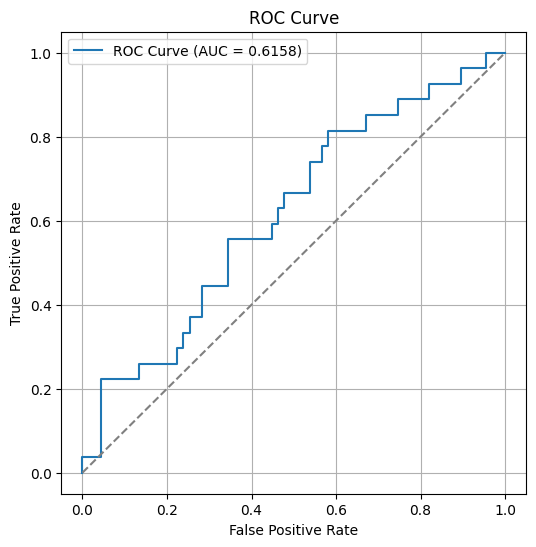


Evaluation Metrics:
f1: 0.4500
precision: 0.3396
recall: 0.6667
auc: 0.6158
threshold: 0.1800
top15_precision: 0.4286
top15_recall: 0.2222
top15_lift: 1.4921
Test Metrics: {'f1': 0.45, 'precision': 0.33962264150943394, 'recall': 0.6666666666666666, 'auc': 0.6158098396904367, 'threshold': 0.18, 'top15_precision': 0.42857142857142855, 'top15_recall': 0.2222222222222222, 'top15_lift': 1.4920634920634919}
Model saved to model/sale_mf/rf/random_forest_model.joblib
Threshold saved to model/sale_mf/rf/random_forest_threshold.txt


auc,▁
best_threshold,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁
train_auc,▁
train_f1,▁


In [21]:
wandb_cfg = load_wandb_config("../configs/config.yaml")
wandb_cfg.run_name = "sale_mf_rf_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="random_forest",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_MF",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_mf/rf/")


# Close wandb run
trainer.close()


Best hyperparameters for xgboost: {'max_depth': 10, 'min_child_weight': 8}
Best threshold tuned on validation set: 0.100
Best validation F1: 0.3438

Metrics using Best Model BEFORE Retraining:
Train F1: 0.7310 | Precision: 0.5760 | Recall: 1.0000 | ROC AUC: 1.0000
Val   F1: 0.3438 | Precision: 0.2391 | Recall: 0.6111 | ROC AUC: 0.4978



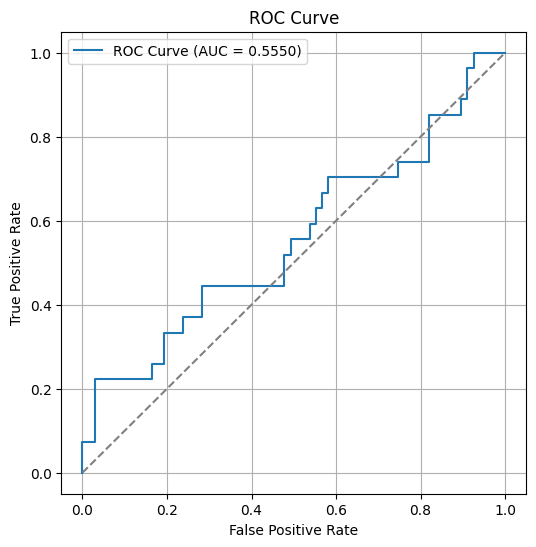


Evaluation Metrics:
f1: 0.3750
precision: 0.3243
recall: 0.4444
auc: 0.5550
threshold: 0.1000
top15_precision: 0.4286
top15_recall: 0.2222
top15_lift: 1.4921
Test Metrics: {'f1': 0.375, 'precision': 0.32432432432432434, 'recall': 0.4444444444444444, 'auc': 0.5550027639579879, 'threshold': 0.1, 'top15_precision': 0.42857142857142855, 'top15_recall': 0.2222222222222222, 'top15_lift': 1.4920634920634919}
Model saved to model/sale_mf/xgboost/xgboost_model.joblib
Threshold saved to model/sale_mf/xgboost/xgboost_threshold.txt


auc,▁
best_threshold,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁
train_auc,▁
train_f1,▁


In [22]:
wandb_cfg = load_wandb_config("../configs/config.yaml")
wandb_cfg.run_name = "sale_mf_xgboost_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="xgboost",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_MF",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_mf/xgboost/")


# Close wandb run
trainer.close()

## Sale_CC


Best hyperparameters for random_forest: {'max_depth': 7, 'min_samples_split': 8}
Best threshold tuned on validation set: 0.210
Best validation F1: 0.4043

Metrics using Best Model BEFORE Retraining:
Train F1: 0.6211 | Precision: 0.4505 | Recall: 1.0000 | ROC AUC: 0.9701
Val   F1: 0.4043 | Precision: 0.2676 | Recall: 0.8261 | ROC AUC: 0.5383



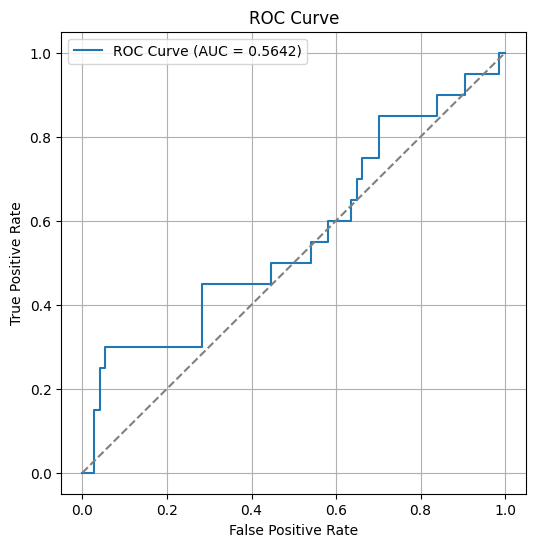


Evaluation Metrics:
f1: 0.3488
precision: 0.2273
recall: 0.7500
auc: 0.5642
threshold: 0.2100
top15_precision: 0.4286
top15_recall: 0.3000
top15_lift: 2.0143
Test Metrics: {'f1': 0.3488372093023256, 'precision': 0.22727272727272727, 'recall': 0.75, 'auc': 0.5641891891891893, 'threshold': 0.21000000000000002, 'top15_precision': 0.42857142857142855, 'top15_recall': 0.3, 'top15_lift': 2.0142857142857142}
Model saved to model/sale_cc/rf/random_forest_model.joblib
Threshold saved to model/sale_cc/rf/random_forest_threshold.txt


auc,▁
best_threshold,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁
train_auc,▁
train_f1,▁


In [23]:
wandb_cfg = load_wandb_config("../configs/config.yaml")
wandb_cfg.run_name = "sale_mf_cc_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="random_forest",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_CC",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_cc/rf/")


# Close wandb run
trainer.close()


Best hyperparameters for xgboost: {'max_depth': 6, 'min_child_weight': 8}
Best threshold tuned on validation set: 0.280
Best validation F1: 0.5306

Metrics using Best Model BEFORE Retraining:
Train F1: 0.9845 | Precision: 0.9695 | Recall: 1.0000 | ROC AUC: 0.9999
Val   F1: 0.5306 | Precision: 0.5000 | Recall: 0.5652 | ROC AUC: 0.6859



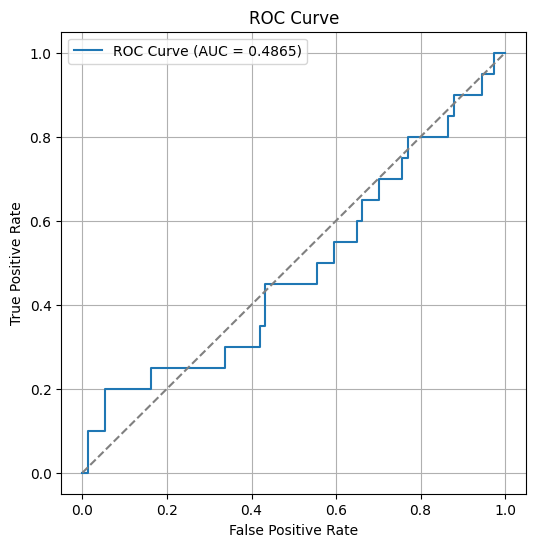


Evaluation Metrics:
f1: 0.2308
precision: 0.1875
recall: 0.3000
auc: 0.4865
threshold: 0.2800
top15_precision: 0.2857
top15_recall: 0.2000
top15_lift: 1.3429
Test Metrics: {'f1': 0.23076923076923078, 'precision': 0.1875, 'recall': 0.3, 'auc': 0.4864864864864865, 'threshold': 0.28, 'top15_precision': 0.2857142857142857, 'top15_recall': 0.2, 'top15_lift': 1.3428571428571427}
Model saved to model/sale_cc/xgboost/xgboost_model.joblib
Threshold saved to model/sale_cc/xgboost/xgboost_threshold.txt


auc,▁
best_threshold,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁
train_auc,▁
train_f1,▁


In [24]:
wandb_cfg = load_wandb_config("../configs/config.yaml")
wandb_cfg.run_name = "sale_cc_xgboost_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="xgboost",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_CC",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_cc/xgboost/")


# Close wandb run
trainer.close()

## CL


Best hyperparameters for random_forest: {'max_depth': 7, 'min_samples_split': 8}
Best threshold tuned on validation set: 0.310
Best validation F1: 0.5424

Metrics using Best Model BEFORE Retraining:
Train F1: 0.8485 | Precision: 0.8465 | Recall: 0.8505 | ROC AUC: 0.9690
Val   F1: 0.5424 | Precision: 0.5000 | Recall: 0.5926 | ROC AUC: 0.6346



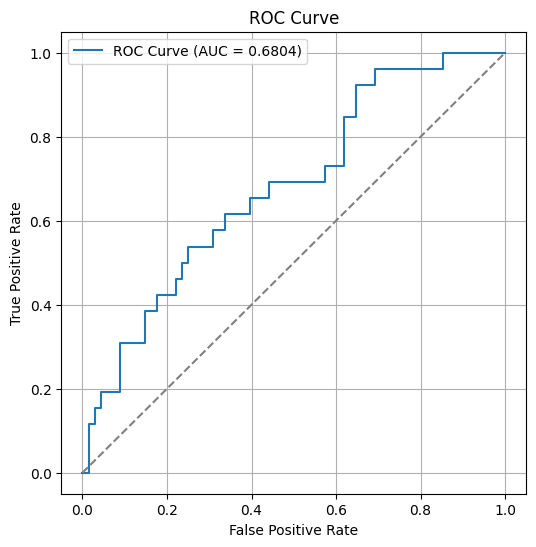


Evaluation Metrics:
f1: 0.4231
precision: 0.4231
recall: 0.4231
auc: 0.6804
threshold: 0.3100
top15_precision: 0.5714
top15_recall: 0.3077
top15_lift: 2.0659
Test Metrics: {'f1': 0.4230769230769231, 'precision': 0.4230769230769231, 'recall': 0.4230769230769231, 'auc': 0.6804298642533937, 'threshold': 0.31, 'top15_precision': 0.5714285714285714, 'top15_recall': 0.3076923076923077, 'top15_lift': 2.0659340659340657}
Model saved to model/sale_cl/rf/random_forest_model.joblib
Threshold saved to model/sale_cl/rf/random_forest_threshold.txt


auc,▁
best_threshold,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁
train_auc,▁
train_f1,▁


In [25]:
wandb_cfg = load_wandb_config("../configs/config.yaml")
wandb_cfg.run_name = "sale_mf_cl_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="random_forest",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_CL",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_cl/rf/")


# Close wandb run
trainer.close()


Best hyperparameters for xgboost: {'max_depth': 3, 'min_child_weight': 8}
Best threshold tuned on validation set: 0.110
Best validation F1: 0.4898

Metrics using Best Model BEFORE Retraining:
Train F1: 0.6071 | Precision: 0.4358 | Recall: 1.0000 | ROC AUC: 0.9907
Val   F1: 0.4898 | Precision: 0.3380 | Recall: 0.8889 | ROC AUC: 0.5937



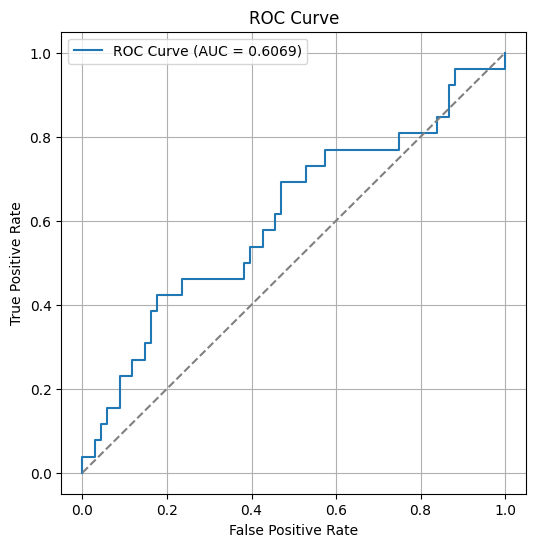


Evaluation Metrics:
f1: 0.4301
precision: 0.2985
recall: 0.7692
auc: 0.6069
threshold: 0.1100
top15_precision: 0.4286
top15_recall: 0.2308
top15_lift: 1.5495
Test Metrics: {'f1': 0.43010752688172044, 'precision': 0.29850746268656714, 'recall': 0.7692307692307693, 'auc': 0.6069004524886877, 'threshold': 0.11, 'top15_precision': 0.42857142857142855, 'top15_recall': 0.23076923076923078, 'top15_lift': 1.5494505494505493}
Model saved to model/sale_cl/xgboost/xgboost_model.joblib
Threshold saved to model/sale_cl/xgboost/xgboost_threshold.txt


auc,▁
best_threshold,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁
train_auc,▁
train_f1,▁


In [26]:
wandb_cfg = load_wandb_config("../configs/config.yaml")
wandb_cfg.run_name = "sale_cl_xgboost_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="xgboost",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_CL",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_cl/xgboost/")


# Close wandb run
trainer.close()

# Optimization

In [41]:
# Assume you know your categorical columns, e.g.:
categorical_cols = ["Sex_M"]

# Instantiate the transformer
pca_transformer = PCATransformer(cat_columns=categorical_cols)

# Fit PCA on training data and transform
pca_loaded = pca_transformer.load("model/pca/")

# Load all data
X = df[feature_cols]
X_transformed = pca_loaded.transform(X)
X_transformed.shape

(933, 13)

In [42]:
import joblib
import os
import pandas as pd
import numpy as np

class ModelPredictor:
    def __init__(self, model_name: str, model_folder: str, feature_cols: list):
        """
        Load saved model and threshold from the given folder.
        
        Args:
            model_name (str): Name of the model (e.g., "random_forest", "xgboost").
            model_folder (str): Folder path where model and threshold are saved.
            feature_cols (list): List of feature column names expected by the model.
        """
        self.model_name = model_name
        self.feature_cols = feature_cols
        
        model_path = os.path.join(model_folder, f"{model_name}_model.joblib")
        threshold_path = os.path.join(model_folder, f"{model_name}_threshold.txt")
        
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"Model file not found: {model_path}")
        if not os.path.exists(threshold_path):
            raise FileNotFoundError(f"Threshold file not found: {threshold_path}")
        
        self.model = joblib.load(model_path)
        
        with open(threshold_path, "r") as f:
            self.best_threshold = float(f.read().strip())
        
        print(f"Loaded model from {model_path}")
        print(f"Loaded threshold: {self.best_threshold:.3f}")

        if hasattr(self.model, "feature_names_in_"):
            print(f"Model trained with features: {self.model.feature_names_in_.tolist()}")

    def validate_features(self, X: pd.DataFrame):
        """
        Validate if prediction dataset matches expected features.
        Raises clear errors if mismatches found.
        """
        missing = [col for col in self.feature_cols if col not in X.columns]
        extra = [col for col in X.columns if col not in self.feature_cols]

        if missing:
            raise ValueError(f"Missing columns for prediction: {missing}")
        if extra:
            print(f"Warning: Extra columns present in prediction data (ignored during filtering): {extra}")

    def predict(self, X: pd.DataFrame) -> (np.ndarray, np.ndarray):
        """
        Predict binary labels and probabilities for input features.
        
        Args:
            X (pd.DataFrame): DataFrame containing feature columns.
            
        Returns:
            preds (np.ndarray): Binary predictions based on threshold.
            probs (np.ndarray): Predicted probabilities (positive class).
        """
        self.validate_features(X)
        
        X_filtered = X[self.feature_cols]
        
        print(f"Using columns for prediction: {X_filtered.columns.tolist()}")

        probs = self.model.predict_proba(X_filtered)[:, 1]
        preds = (probs >= self.best_threshold).astype(int)
        
        return preds, probs

In [44]:
# Perform prediction for all clients MF
model_name = "random_forest"
model_folder = "model/sale_mf/rf/"
predictor = ModelPredictor(model_name=model_name, model_folder=model_folder, feature_cols=X_transformed.columns)
preds, probs = predictor.predict(X_transformed)
df['prob_mf'] = probs
df['prob_mf']

Loaded model from model/sale_mf/rf/random_forest_model.joblib
Loaded threshold: 0.180
Model trained with features: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
Using columns for prediction: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']


0      0.290830
1      0.320395
2      0.472037
3      0.544566
4      0.383942
         ...   
964    0.383049
965    0.522829
966    0.447345
967    0.387990
968    0.468530
Name: prob_mf, Length: 933, dtype: float64

In [45]:
# Perform prediction for all clients CC
model_name = "random_forest"
model_folder = "model/sale_cc/rf/"
predictor = ModelPredictor(model_name=model_name, model_folder=model_folder, feature_cols=X_transformed.columns)
preds, probs = predictor.predict(X_transformed)
df['prob_cc'] = probs
df['prob_cc']


Loaded model from model/sale_cc/rf/random_forest_model.joblib
Loaded threshold: 0.210
Model trained with features: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
Using columns for prediction: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']


0      0.510608
1      0.171062
2      0.747698
3      0.476027
4      0.411835
         ...   
964    0.694932
965    0.483320
966    0.694299
967    0.391142
968    0.660353
Name: prob_cc, Length: 933, dtype: float64

In [46]:
# Perform prediction for all clients CL
model_name = "random_forest"
model_folder = "model/sale_cl/rf/"
predictor = ModelPredictor(model_name=model_name, model_folder=model_folder, feature_cols=X_transformed.columns)
preds, probs = predictor.predict(X_transformed)
df['prob_cl'] = probs
df['prob_cl']


Loaded model from model/sale_cl/rf/random_forest_model.joblib
Loaded threshold: 0.310
Model trained with features: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
Using columns for prediction: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']


0      0.304955
1      0.387454
2      0.619980
3      0.559023
4      0.659398
         ...   
964    0.586611
965    0.566415
966    0.551922
967    0.505101
968    0.505060
Name: prob_cl, Length: 933, dtype: float64

In [48]:
# Create Strategy

def greedy_selection(df):
    # Calculate expected revenue per product
    df['exp_rev_mf'] = df['prob_mf'] * df['Revenue_MF']
    df['exp_rev_cc'] = df['prob_cc'] * df['Revenue_CC']
    df['exp_rev_cl'] = df['prob_cl'] * df['Revenue_CL']

    # Find best product per client and its expected revenue
    exp_rev_cols = ['exp_rev_mf', 'exp_rev_cc', 'exp_rev_cl']
    df['best_exp_rev'] = df[exp_rev_cols].max(axis=1)
    df['best_product'] = df[exp_rev_cols].idxmax(axis=1)

    # Select top 15% clients by best expected revenue
    n_select = int(0.15 * len(df))
    df_selected = df.nlargest(n_select, 'best_exp_rev').copy()

    # Map product column names to simplified product names
    product_map = {
        'exp_rev_mf': 'MF',
        'exp_rev_cc': 'CC',
        'exp_rev_cl': 'CL'
    }
    df_selected['offer_product'] = df_selected['best_product'].map(product_map)

    # Final output
    return df_selected[['Client', 'offer_product', 'best_exp_rev']]


In [54]:
df_selected = greedy_selection(df)
print(f"Total_Revenue: {sum(df_selected['best_exp_rev'])}")
df_selected.shape

Total_Revenue: 2155.808867783992


(139, 3)

In [60]:
from scipy.optimize import linprog

def optimization_selection(df):
    n = len(df)
    products = ['mf', 'cc', 'cl']

    # Prepare expected revenue vector (length 3*n)
    exp_revs = np.zeros(3 * n)
    for i, p in enumerate(products):
        exp_revs[i*n:(i+1)*n] = df[f'prob_{p}'] * df[f'Revenue_{p.upper()}']

    # Objective: maximize expected revenue -> minimize negative for linprog
    c = -exp_revs

    # Constraints:

    # 1) Each customer gets at most one offer:
    A_ub = np.zeros((n + 1, 3*n))
    b_ub = np.zeros(n + 1)

    for i in range(n):
        # sum of products assigned to customer i <= 1
        A_ub[i, i] = 1          # mf variable
        A_ub[i, i + n] = 1      # cc variable
        A_ub[i, i + 2*n] = 1    # cl variable
        b_ub[i] = 1

    # 2) Total offers ≤ 15% of all customers
    A_ub[n, :] = 1
    b_ub[n] = 0.15 * n

    # Bounds: variables between 0 and 1 (relaxed)
    bounds = [(0, 1)] * (3 * n)

    # Solve LP
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

    if not res.success:
        raise RuntimeError("Optimization failed:", res.message)

    x = res.x

    # Post-process results: pick product with max fractional value for each customer
    offers = []
    for i in range(n):
        vals = [x[i], x[i + n], x[i + 2*n]]
        max_val = max(vals)
        if max_val > 0:
            prod_idx = vals.index(max_val)
            prod = products[prod_idx].upper()
            expected_revenue = exp_revs[prod_idx * n + i]
            offers.append({
                'Client': df.iloc[i]['Client'],        # Use iloc to avoid KeyError
                'Product': prod,
                'Expected_Revenue': expected_revenue
            })

    # Enforce offer cap by sorting and selecting top 15%
    offers_df = pd.DataFrame(offers)
    offers_df = offers_df.sort_values('Expected_Revenue', ascending=False).head(int(0.15 * n)).reset_index(drop=True)

    return offers_df



In [62]:
df_selected = optimization_selection(df)
print(f"Total_Revenue: {sum(df_selected['Expected_Revenue'])}")
df_selected.shape

Total_Revenue: 2155.808867783992


(139, 3)

In [64]:
df_selected[["Client", "Product"]].to_csv("../results/target_customers.csv", index=0)